In [ ]:
#!mkdir oxford

mkdir: cannot create directory ‘oxford’: File exists


In [ ]:
!wget https://www.robots.ox.ac.uk/~vgg/data/oxbuildings/oxbuild_images.tgz
!tar -xf /content/oxbuild_images.tgz --directory /content/oxford
!rm /content/oxbuild_images.tgz

--2022-01-28 23:03:57--  https://www.robots.ox.ac.uk/~vgg/data/oxbuildings/oxbuild_images.tgz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1980280437 (1.8G) [application/x-gzip]
Saving to: ‘oxbuild_images.tgz’

oxbuild_images.tgz  100%[===================>]   1.84G  29.3MB/s    in 68s     

2022-01-28 23:05:06 (27.8 MB/s) - ‘oxbuild_images.tgz’ saved [1980280437/1980280437]



In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import os
import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions, preprocess_input
from keras.models import Model

Using TensorFlow backend.


In [ ]:
model_VGG19 = keras.applications.VGG19(weights='imagenet', include_top=True)
model_VGG16 = keras.applications.VGG16(weights='imagenet', include_top=True)
model_ResNet50 = keras.applications.ResNet50(weights='imagenet', include_top=True)


Instructions for updating:
If using Keras pass *_constraint arguments to layers.

102858752/102853048 [==============================] - 1s 0us/step


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def load_image(path):
    img = image.load_img(path, target_size=model_ResNet50.input_shape[1:3])
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

shape of x:  (1, 224, 224, 3)
data type:  float32


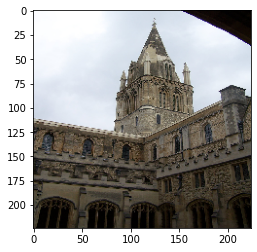

In [ ]:
img, x = load_image("/content/oxford/christ_church_000293.jpg")
print("shape of x: ", x.shape)
print("data type: ", x.dtype)
plt.imshow(img)

In [ ]:
# forward the image through the network
predictions = model_ResNet50.predict(x)

# print out the 
for _, pred, prob in decode_predictions(predictions)[0]:
    print("predicted %s with probability %0.3f" % (pred, prob))


40960/35363 [==================================] - 0s 0us/step
predicted monastery with probability 0.451
predicted bell_cote with probability 0.181
predicted church with probability 0.152
predicted vault with probability 0.080
predicted palace with probability 0.074


In [ ]:
#feature extractor for ResNrt50
feat_extractor_ResNet50 = Model(inputs=model_ResNet50.input, outputs=model_ResNet50.get_layer("avg_pool").output) #for ResNet50
#feat_extractor.summary()

In [ ]:
feat_extractor_VGG16 = Model(inputs=model_VGG16.input, outputs=model_VGG16.get_layer("fc1").output)
feat_extractor_VGG19 = Model(inputs=model_VGG19.input, outputs=model_VGG19.get_layer("fc1").output)


(1, 2048)
(2048,)


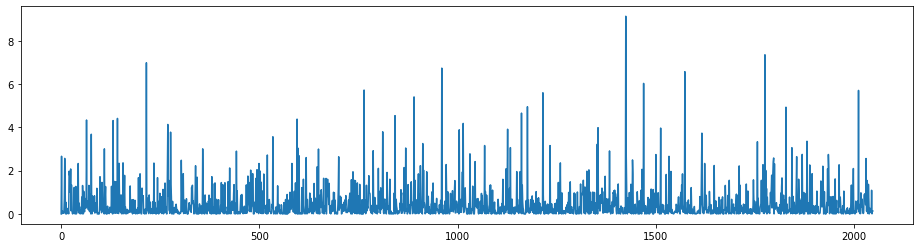

In [ ]:
img, x = load_image("/content/oxford/all_souls_000012.jpg")
feat = feat_extractor_ResNet50.predict(x)
print(feat.shape)

plt.figure(figsize=(16,4))
print(feat[0].shape)
plt.plot(feat[0])

In [ ]:
images_path = "/content/oxford"
image_extensions = ['.jpg', '.png', '.jpeg']   # case-insensitive (upper/lower doesn't matter)
max_num_images = 10000

images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(images_path) for f in filenames if os.path.splitext(f)[1].lower() in image_extensions]

if max_num_images < len(images):
    images = [images[i] for i in sorted(random.sample(xrange(len(images)), max_num_images))]
    
print(images)
print("keeping %d images to analyze" % len(images))

['/content/oxford/trinity_000040.jpg', '/content/oxford/new_000377.jpg', '/content/oxford/pitt_rivers_000007.jpg', '/content/oxford/new_000999.jpg', '/content/oxford/pitt_rivers_000198.jpg', '/content/oxford/oxford_002120.jpg', '/content/oxford/oxford_000341.jpg', '/content/oxford/magdalen_000873.jpg', '/content/oxford/oxford_003531.jpg', '/content/oxford/oxford_002146.jpg', '/content/oxford/hertford_000108.jpg', '/content/oxford/magdalen_000747.jpg', '/content/oxford/oxford_000377.jpg', '/content/oxford/magdalen_000989.jpg', '/content/oxford/keble_000186.jpg', '/content/oxford/all_souls_000160.jpg', '/content/oxford/oxford_002049.jpg', '/content/oxford/all_souls_000000.jpg', '/content/oxford/magdalen_000335.jpg', '/content/oxford/oxford_003428.jpg', '/content/oxford/radcliffe_camera_000217.jpg', '/content/oxford/magdalen_000489.jpg', '/content/oxford/oxford_002273.jpg', '/content/oxford/christ_church_000131.jpg', '/content/oxford/oxford_003015.jpg', '/content/oxford/radcliffe_camera_0

In [ ]:
feature_VGG16 = []
import time
import cv2
tic = time.perf_counter()


features = []
for i, image_path in enumerate(images):
    if i % 500 == 0:
        print("analyzing image %d / %d. " % (i, len(images)))
        tic = time.perf_counter()
    img, x = load_image(image_path);
    feat = feat_extractor_VGG16.predict(x)[0]
    feature_VGG16.append(feat)
    toc = time.perf_counter()
    
elap = toc-tic;

print("Total time elapsed is : " , elap)

print(len(feature_VGG16))

print('finished extracting features for %d images' % len(images))

analyzing image 0 / 5063. 
analyzing image 500 / 5063. 
analyzing image 1000 / 5063. 
analyzing image 1500 / 5063. 
analyzing image 2000 / 5063. 
analyzing image 2500 / 5063. 
analyzing image 3000 / 5063. 
analyzing image 3500 / 5063. 
analyzing image 4000 / 5063. 
analyzing image 4500 / 5063. 
analyzing image 5000 / 5063. 
Total time elapsed is :  2.840219247999812
5063
finished extracting features for 5063 images


In [ ]:
feature_VGG19 = []
import time
import cv2
tic = time.perf_counter()


features = []
for i, image_path in enumerate(images):
    if i % 500 == 0:
        print("analyzing image %d / %d. " % (i, len(images)))
    img, x = load_image(image_path);
    feat = feat_extractor_VGG19.predict(x)[0]
    feature_VGG19.append(feat)
toc = time.perf_counter()
elap = toc-tic;

print("Total time elapsed is : " , elap)

print(len(feature_VGG19))

print('finished extracting features for %d images' % len(images))

analyzing image 0 / 5063. 
analyzing image 500 / 5063. 
analyzing image 1000 / 5063. 
analyzing image 1500 / 5063. 
analyzing image 2000 / 5063. 
analyzing image 2500 / 5063. 
analyzing image 3000 / 5063. 
analyzing image 3500 / 5063. 
analyzing image 4000 / 5063. 
analyzing image 4500 / 5063. 
analyzing image 5000 / 5063. 
Total time elapsed is :  3.230020177000142
5063
finished extracting features for 5063 images


In [ ]:
feature_Resnet50 = []
import time
import cv2
tic = time.perf_counter()


for i, image_path in enumerate(images):
    if i % 500 == 0:
        print("analyzing image %d / %d. " % (i, len(images)))
        
    img, x = load_image(image_path);
    feat = feat_extractor_ResNet50.predict(x)[0]
    feature_Resnet50.append(feat)
toc = time.perf_counter()
elap = toc-tic;

print("Total time elapsed is : " , elap)

print(len(feature_Resnet50))

print('finished extracting features for %d images' % len(images))

analyzing image 0 / 5063. 
analyzing image 500 / 5063. 
analyzing image 1000 / 5063. 
analyzing image 1500 / 5063. 
analyzing image 2000 / 5063. 
analyzing image 2500 / 5063. 
analyzing image 3000 / 5063. 
analyzing image 3500 / 5063. 
analyzing image 4000 / 5063. 
analyzing image 4500 / 5063. 
analyzing image 5000 / 5063. 
Total time elapsed is :  2.9071655239999927
5063
finished extracting features for 5063 images


In [ ]:
features_VGG16 = []
features_VGG19 = []
features_ResNet50 = []

In [ ]:
print(len(feature_Resnet50))
print(len(feature_VGG19))
print(len(feature_VGG16))

5063
5063
5063


In [ ]:
from sklearn.decomposition import PCA

features_Resnet50 = np.asarray(feature_Resnet50)

In [ ]:

features_VGG16 = np.asarray(feature_VGG16)
features_VGG19 = np.asarray(feature_VGG19)

pca = PCA(n_components=300)
pca.fit(features_VGG16)

pca_features_VGG16 = pca.transform(features_VGG16)

In [ ]:
pca = PCA(n_components=300)
pca.fit(features_VGG19)

pca_features_VGG19 = pca.transform(features_VGG19)

In [ ]:
pca = PCA(n_components=300)
pca.fit(feature_Resnet50)

pca_features_ResNet50 = pca.transform(feature_Resnet50)

In [ ]:
print("Shape before PCA")
print(len(features_VGG16[0]))
print(len(features_VGG19[0]))
print(len(feature_Resnet50[0]))

print("Shape After PCA")
print((pca_features_VGG16[0].shape))
print((pca_features_VGG19[0].shape))
print((pca_features_ResNet50[0].shape))


Shape before PCA
4096
4096
2048
Shape After PCA
(300,)
(300,)
(300,)


190


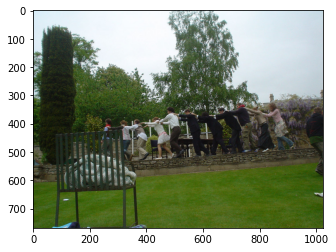

In [ ]:
import random

# grab a random query image
#query_image_idx = int(len(images) * random.random())
a = 190
a =  int(a)
query_image_idx = int(a)
print(query_image_idx)

# let's display the image
img = image.load_img(images[a])
plt.imshow(img)

similar_idx_VGG16 =[]
similar_idx_VGG19 =[]
similar_idx_ResNet50 = []

In [ ]:
from scipy.spatial import distance

similar_idx_VGG16 = [ distance.cosine(pca_features_VGG16[query_image_idx], feat) for feat in pca_features_VGG16 ]
similar_idx_VGG19 = [ distance.cosine(pca_features_VGG19[query_image_idx], feat) for feat in pca_features_VGG19 ]
similar_idx_ResNet50 = [ distance.cosine(pca_features_ResNet50[query_image_idx], feat) for feat in pca_features_ResNet50 ]


[1915, 711, 4306, 3042, 3606, 4676, 1090, 1041, 2488, 2851]


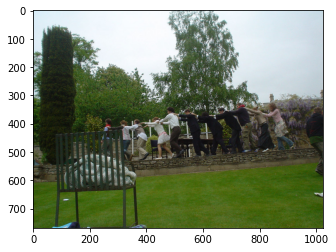

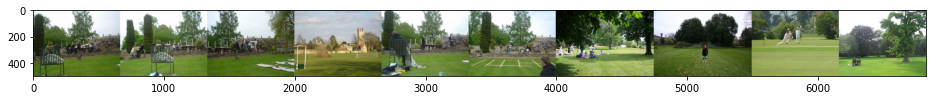

In [ ]:
idx_closest = sorted(range(len(similar_idx_ResNet50)), key=lambda k: similar_idx_ResNet50[k])[1:11]
print(idx_closest)
thumbs = []
for idx in (idx_closest):
    img = image.load_img(images[idx])
    img = img.resize((int(img.width * 500 / img.height), 500))
    thumbs.append(img)
    #print(img)
concat_image = np.concatenate([np.asarray(t) for t in thumbs], axis=1)
img = image.load_img(images[a])
plt.imshow(img)
plt.figure(figsize = (16,12))
plt.imshow(concat_image)

[1915, 711, 3606, 4676, 4306]


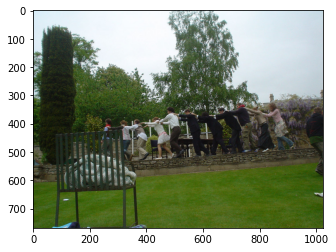

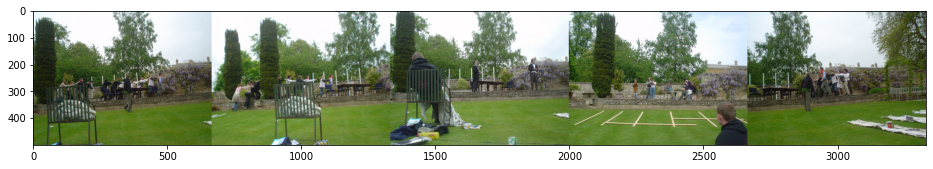

In [ ]:
idx_closest = sorted(range(len(similar_idx_VGG19)), key=lambda k: similar_idx_VGG19[k])[1:6]
print(idx_closest)
thumbs = []
for idx in (idx_closest):
    img = image.load_img(images[idx])
    img = img.resize((int(img.width * 500 / img.height), 500))
    thumbs.append(img)
    #print(img)
concat_image = np.concatenate([np.asarray(t) for t in thumbs], axis=1)
img = image.load_img(images[a])
plt.imshow(img)
plt.figure(figsize = (16,12))
plt.imshow(concat_image)

[1915, 711, 4306, 3042]


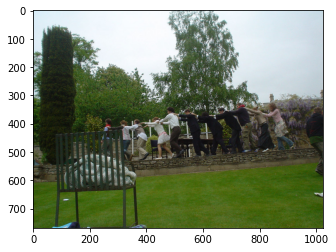

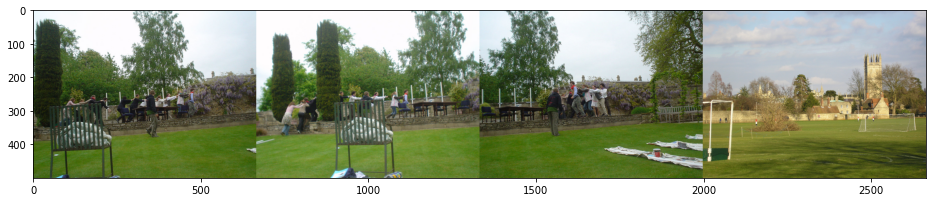

In [ ]:
idx_closest = sorted(range(len(similar_idx_ResNet50)), key=lambda k: similar_idx_ResNet50[k])[1:5]
print(idx_closest)
thumbs = []
for idx in (idx_closest):
    img = image.load_img(images[idx])
    img = img.resize((int(img.width * 500 / img.height), 500))
    thumbs.append(img)
    #print(img)
concat_image = np.concatenate([np.asarray(t) for t in thumbs], axis=1)
img = image.load_img(images[a])
plt.imshow(img)
plt.figure(figsize = (16,12))
plt.imshow(concat_image)

In [ ]:
# import numpy as np

# # This is where we try to evaluate the closest distance in a matrix and sort them and take the mean out of the same as precesion.

# def get_closest_images(query_image_idx, num_results):
#     distances = [ distance.cosine(pca_features[query_image_idx], feat) for feat in pca_features ]
#     #print(sorted(distances)[1:num_results+1])
#     #a = np.mean(sorted(distances)[1:num_results+1])
#     print("Average of ",num_results,"is : ", np.mean(sorted(distances)[1:num_results+1]))
    
#     idx_closest = sorted(range(len(distances)), key=lambda k: distances[k])[1:num_results+1]
#     return idx_closest

# def get_concatenated_images(indexes, thumb_height):
#     thumbs = []
#     for idx in indexes:
#         img = image.load_img(images[idx])
#         img = img.resize((int(img.width * thumb_height / img.height), thumb_height))
#         thumbs.append(img)
#     concat_image = np.concatenate([np.asarray(t) for t in thumbs], axis=1)
#     return concat_image

In [ ]:
# query_image_idx = int(25)
# print("Query number : ", query_image_idx )
# num = int(10)
# idx_closest = get_closest_images(query_image_idx, num)
# num = int(25)
# idx_closest = get_closest_images(query_image_idx, num)
# num = int(50)
# idx_closest = get_closest_images(query_image_idx, num)

# query_image_idx = int(50)
# print("Query number : ", query_image_idx )
# num = int(10)
# idx_closest = get_closest_images(query_image_idx, num)
# num = int(25)
# idx_closest = get_closest_images(query_image_idx, num)
# num = int(50)
# idx_closest = get_closest_images(query_image_idx, num)

# query_image_idx = int(693)
# print("Query number : ", query_image_idx )
# num = int(10)
# idx_closest = get_closest_images(query_image_idx, num)
# num = int(25)
# idx_closest = get_closest_images(query_image_idx, num)
# num = int(50)
# idx_closest = get_closest_images(query_image_idx, num)

# query_image_idx = int(1000)
# print("Query number : ", query_image_idx )
# num = int(10)
# idx_closest = get_closest_images(query_image_idx, num)
# num = int(25)
# idx_closest = get_closest_images(query_image_idx, num)
# num = int(50)
# idx_closest = get_closest_images(query_image_idx, num)

# query_image_idx = int(5012)
# print("Query number : ", query_image_idx )
# num = int(10)
# idx_closest = get_closest_images(query_image_idx, num)
# num = int(25)
# idx_closest = get_closest_images(query_image_idx, num)
# num = int(50)
# idx_closest = get_closest_images(query_image_idx, num)

In [ ]:
def get_closest_images(query_image_idx, num_results):
    distances = [ distance.cosine(pca_features_VGG16[query_image_idx], feat) for feat in pca_features_VGG16 ]
    #print(sorted(distances)[1:num_results+1])
    #a = np.mean(sorted(distances)[1:num_results+1])
    m = (sorted(distances)[1:num_results+1])
    ap = []
    for i in m:
      if i<0.5:
        ap = np.append(ap,i)
    ap = len(ap)/int(num_results)

    #print("Average Precision of ",num_results,"is : ", ap )
    
    idx_closest = sorted(range(len(distances)), key=lambda k: distances[k])[1:num_results+1]
    return idx_closest,ap

In [ ]:
# #VGG16
# query_image_idx = int(25)
# print("Query number : ", query_image_idx )
# num = int(10)
# idx_closest,ap = get_closest_images(query_image_idx, num)
# num = int(25)
# idx_closest,ap = get_closest_images(query_image_idx, num)
# num = int(50)
# idx_closest,ap = get_closest_images(query_image_idx, num)

# query_image_idx = int(50)
# print("Query number : ", query_image_idx )
# num = int(10)
# idx_closest,ap = get_closest_images(query_image_idx, num)
# num = int(25)
# idx_closest,ap = get_closest_images(query_image_idx, num)
# num = int(50)
# idx_closest,ap = get_closest_images(query_image_idx, num)

# query_image_idx = int(693)
# print("Query number : ", query_image_idx )
# num = int(10)
# idx_closest = get_closest_images(query_image_idx, num)
# num = int(25)
# idx_closest = get_closest_images(query_image_idx, num)
# num = int(50)
# idx_closest = get_closest_images(query_image_idx, num)

# query_image_idx = int(1000)
# print("Query number : ", query_image_idx )
# num = int(10)
# idx_closest = get_closest_images(query_image_idx, num)
# num = int(25)
# idx_closest = get_closest_images(query_image_idx, num)
# num = int(50)
# idx_closest = get_closest_images(query_image_idx, num)

# query_image_idx = int(5012)
# print("Query number : ", query_image_idx )
# num = int(10)
# idx_closest = get_closest_images(query_image_idx, num)
# num = int(25)
# idx_closest = get_closest_images(query_image_idx, num)
# num = int(50)
# idx_closest = get_closest_images(query_image_idx, num)

In [ ]:
VGG_16_10 = (0.7+1+1+1+0.9)/5
VGG_16_25 = (3+0.28+0.36)/5
VGG_16_50 = (3+0.18+0.14)/5

In [ ]:
print(VGG_16_10)
print (VGG_16_25)
print (VGG_16_50)


0.9200000000000002
0.728
0.664


In [ ]:
# FOR VGG16
num_image = 500
a = np.arange(num_image)
num = int(50)
map = []

for i in a:
  i = int(i)
  idx_closest,ap = get_closest_images(i, 50)
  map = np.append(map,ap)
  MaP_VGG16 = np.sum(map)/num_image
print("MaP is : ", np.sum(map)/num_image)

MaP is :  0.42716


In [ ]:
def get_closest_images(query_image_idx, num_results):
    distances = [ distance.cosine(pca_features_VGG19[query_image_idx], feat) for feat in pca_features_VGG19 ]
    #print(sorted(distances)[1:num_results+1])
    #a = np.mean(sorted(distances)[1:num_results+1])
    m = (sorted(distances)[1:num_results+1])
    ap = []
    for i in m:
      if i<0.5:
        ap = np.append(ap,i)
    ap = len(ap)/int(num_results)

    #print("Average Precision of ",num_results,"is : ", ap )
    
    idx_closest = sorted(range(len(distances)), key=lambda k: distances[k])[1:num_results+1]
    return idx_closest,ap

In [ ]:
# #VGG19
# query_image_idx = int(25)
# print("Query number : ", query_image_idx )
# num = int(10)
# idx_closest,ap = get_closest_images(query_image_idx, num)
# num = int(25)
# idx_closest,ap = get_closest_images(query_image_idx, num)
# num = int(50)
# idx_closest,ap = get_closest_images(query_image_idx, num)

# query_image_idx = int(50)
# print("Query number : ", query_image_idx )
# num = int(10)
# idx_closest,ap = get_closest_images(query_image_idx, num)
# num = int(25)
# idx_closest,ap = get_closest_images(query_image_idx, num)
# num = int(50)
# idx_closest,ap = get_closest_images(query_image_idx, num)

# query_image_idx = int(693)
# print("Query number : ", query_image_idx )
# num = int(10)
# idx_closest = get_closest_images(query_image_idx, num)
# num = int(25)
# idx_closest = get_closest_images(query_image_idx, num)
# num = int(50)
# idx_closest = get_closest_images(query_image_idx, num)

# query_image_idx = int(1000)
# print("Query number : ", query_image_idx )
# num = int(10)
# idx_closest = get_closest_images(query_image_idx, num)
# num = int(25)
# idx_closest = get_closest_images(query_image_idx, num)
# num = int(50)
# idx_closest = get_closest_images(query_image_idx, num)

# query_image_idx = int(5012)
# print("Query number : ", query_image_idx )
# num = int(10)
# idx_closest = get_closest_images(query_image_idx, num)
# num = int(25)
# idx_closest = get_closest_images(query_image_idx, num)
# num = int(50)
# idx_closest = get_closest_images(query_image_idx, num)

In [ ]:
VGG_19_10 = (3+0.2+1)/5
VGG_19_25 =(0.08+4)/5
VGG_19_50 =(0.04+3+0.5)/5

print(VGG_19_10)
print(VGG_19_25)
print(VGG_19_50)

0.8400000000000001
0.8160000000000001
0.708


In [ ]:
#for VGG19

num_image = 500
a = np.arange(num_image)
num = int(50)
map = []

for i in a:
  i = int(i)
  idx_closest,ap = get_closest_images(i, 50)
  map = np.append(map,ap)
  MaP_VGG19 = np.sum(map)/num_image
print("MaP is : ", np.sum(map)/num_image)

MaP is :  0.45152


In [ ]:
def get_closest_images(query_image_idx, num_results):
    distances = [ distance.cosine(pca_features_ResNet50[query_image_idx], feat) for feat in pca_features_ResNet50 ]
    #print(sorted(distances)[1:num_results+1])
    #a = np.mean(sorted(distances)[1:num_results+1])
    m = (sorted(distances)[1:num_results+1])
    ap = []
    for i in m:
      if i<0.5:
        ap = np.append(ap,i)
    ap = len(ap)/int(num_results)

    #print("Average Precision of ",num_results,"is : ", ap )
    
    idx_closest = sorted(range(len(distances)), key=lambda k: distances[k])[1:num_results+1]
    return idx_closest,ap

In [ ]:
# #ResNet50
# query_image_idx = int(25)
# print("Query number : ", query_image_idx )
# num = int(10)
# idx_closest,ap = get_closest_images(query_image_idx, num)
# num = int(25)
# idx_closest,ap = get_closest_images(query_image_idx, num)
# num = int(50)
# idx_closest,ap = get_closest_images(query_image_idx, num)

# query_image_idx = int(50)
# print("Query number : ", query_image_idx )
# num = int(10)
# idx_closest,ap = get_closest_images(query_image_idx, num)
# num = int(25)
# idx_closest,ap = get_closest_images(query_image_idx, num)
# num = int(50)
# idx_closest,ap = get_closest_images(query_image_idx, num)

# query_image_idx = int(693)
# print("Query number : ", query_image_idx )
# num = int(10)
# idx_closest = get_closest_images(query_image_idx, num)
# num = int(25)
# idx_closest = get_closest_images(query_image_idx, num)
# num = int(50)
# idx_closest = get_closest_images(query_image_idx, num)

# query_image_idx = int(1000)
# print("Query number : ", query_image_idx )
# num = int(10)
# idx_closest = get_closest_images(query_image_idx, num)
# num = int(25)
# idx_closest = get_closest_images(query_image_idx, num)
# num = int(50)
# idx_closest = get_closest_images(query_image_idx, num)

# query_image_idx = int(5012)
# print("Query number : ", query_image_idx )
# num = int(10)
# idx_closest = get_closest_images(query_image_idx, num)
# num = int(25)
# idx_closest = get_closest_images(query_image_idx, num)
# num = int(50)
# idx_closest = get_closest_images(query_image_idx, num)

In [ ]:
ResNet50_10 = (0.3+3+0.8)/5
ResNet50_25 = (0.12+3+0.32)/5
ResNet50_50 = (0.06+3+0.16)/5

print(ResNet50_10)
print(ResNet50_25)
print(ResNet50_50)


0.82
0.688
0.644


In [ ]:
#for ResNet50

num_image = 500
a = np.arange(num_image)
num = int(50)
map = []

for i in a:
  i = int(i)
  idx_closest,ap = get_closest_images(i, 50)
  map = np.append(map,ap)
  MaP_ResNet50 = np.sum(map)/num_image
print("MaP is : ", np.sum(map)/num_image)

MaP is :  0.56052


No handles with labels found to put in legend.


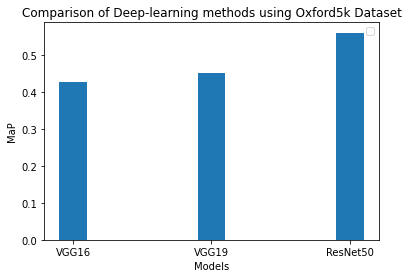

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
  
X = ['VGG16','VGG19','ResNet50']
Y = [MaP_VGG16,MaP_VGG19,MaP_ResNet50]

  
X_axis = np.arange(len(X))
  
plt.bar(X_axis, Y, 0.2)

  
plt.xticks(X_axis, X)
plt.xlabel("Models")
plt.ylabel("MaP")
plt.title("Comparison of Deep-learning methods using Oxford5k Dataset")
plt.legend()
plt.show()

In [ ]:
################################################################################################################################################################################

In [ ]:
####################################################################################################################################################################################

In [ ]:
# !mkdir paris6k
! wget https://www.robots.ox.ac.uk/~vgg/data/parisbuildings/paris_1.tgz
! wget https://www.robots.ox.ac.uk/~vgg/data/parisbuildings/paris_2.tgz
!tar -xvf /content/paris_1.tgz --directory /content/paris6k
!tar -xvf /content/paris_2.tgz --directory /content/paris6k
# !rm /content/paris_1.tgz
# !rm /content/paris_2.tgz

--2022-01-28 23:38:04--  https://www.robots.ox.ac.uk/~vgg/data/parisbuildings/paris_1.tgz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1269538001 (1.2G) [application/x-gzip]
Saving to: ‘paris_1.tgz’

paris_1.tgz         100%[===================>]   1.18G  28.4MB/s    in 43s     

2022-01-28 23:38:47 (28.1 MB/s) - ‘paris_1.tgz’ saved [1269538001/1269538001]

--2022-01-28 23:38:48--  https://www.robots.ox.ac.uk/~vgg/data/parisbuildings/paris_2.tgz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1343042257 (1.2G) [application/x-gzip]
Saving to: ‘paris_2.tgz’

paris_2.tgz         100%[===================>]   1.25G  29.7MB/s    in 46s     

2022-01-28 23:39:34 (27.9 MB/s)

In [ ]:
# Removing corrupted files from the paris6k

In [ ]:
!rm /content/paris6k/paris/louvre/paris_louvre_000136.jpg
!rm /content/paris6k/paris/louvre/paris_louvre_000146.jpg
!rm /content/paris6k/paris/moulinrouge/paris_moulinrouge_000422.jpg
!rm /content/paris6k/paris/museedorsay/paris_museedorsay_001059.jpg
!rm /content/paris6k/paris/notredame/paris_notredame_000188.jpg
!rm /content/paris6k/paris/pantheon/paris_pantheon_000284.jpg
!rm /content/paris6k/paris/pantheon/paris_pantheon_000960.jpg
!rm /content/paris6k/paris/pantheon/paris_pantheon_000974.jpg
!rm /content/paris6k/paris/pompidou/paris_pompidou_000195.jpg
!rm /content/paris6k/paris/pompidou/paris_pompidou_000196.jpg
!rm /content/paris6k/paris/pompidou/paris_pompidou_000201.jpg
!rm /content/paris6k/paris/pompidou/paris_pompidou_000467.jpg
!rm /content/paris6k/paris/pompidou/paris_pompidou_000640.jpg
!rm /content/paris6k/paris/sacrecoeur/paris_sacrecoeur_000299.jpg
!rm /content/paris6k/paris/sacrecoeur/paris_sacrecoeur_000330.jpg
!rm /content/paris6k/paris/sacrecoeur/paris_sacrecoeur_000353.jpg
!rm /content/paris6k/paris/triomphe/paris_triomphe_000662.jpg
!rm /content/paris6k/paris/triomphe/paris_triomphe_000833.jpg
!rm /content/paris6k/paris/triomphe/paris_triomphe_000863.jpg
!rm /content/paris6k/paris/triomphe/paris_triomphe_000867.jpg

rm: cannot remove '/content/paris6k/paris/louvre/paris_louvre_000136.jpg': No such file or directory
rm: cannot remove '/content/paris6k/paris/louvre/paris_louvre_000146.jpg': No such file or directory
rm: cannot remove '/content/paris6k/paris/moulinrouge/paris_moulinrouge_000422.jpg': No such file or directory
rm: cannot remove '/content/paris6k/paris/museedorsay/paris_museedorsay_001059.jpg': No such file or directory
rm: cannot remove '/content/paris6k/paris/notredame/paris_notredame_000188.jpg': No such file or directory
rm: cannot remove '/content/paris6k/paris/pantheon/paris_pantheon_000284.jpg': No such file or directory
rm: cannot remove '/content/paris6k/paris/pantheon/paris_pantheon_000960.jpg': No such file or directory
rm: cannot remove '/content/paris6k/paris/pantheon/paris_pantheon_000974.jpg': No such file or directory
rm: cannot remove '/content/paris6k/paris/pompidou/paris_pompidou_000195.jpg': No such file or directory
rm: cannot remove '/content/paris6k/paris/pompido

In [ ]:
!mkdir test

In [ ]:
!cp -r /content/paris6k/paris/defense/*.jpg /content/test
!cp -r /content/paris6k/paris/eiffel/*.jpg /content/test
!cp -r /content/paris6k/paris/general/*.jpg /content/test
!cp -r /content/paris6k/paris/invalides/*.jpg /content/test
!cp -r /content/paris6k/paris/louvre/*.jpg /content/test
!cp -r /content/paris6k/paris/moulinrouge/*.jpg /content/test
!cp -r /content/paris6k/paris/museedorsay/*.jpg /content/test
!cp -r /content/paris6k/paris/notredame/*.jpg /content/test
!cp -r /content/paris6k/paris/pantheon/*.jpg /content/test
!cp -r /content/paris6k/paris/pompidou/*.jpg /content/test
!cp -r /content/paris6k/paris/sacrecoeur/*.jpg /content/test
!cp -r /content/paris6k/paris/triomphe/*.jpg /content/test

cp: cannot stat '/content/paris6k/paris/defense/*.jpg': No such file or directory
cp: cannot stat '/content/paris6k/paris/eiffel/*.jpg': No such file or directory
cp: cannot stat '/content/paris6k/paris/general/*.jpg': No such file or directory
cp: cannot stat '/content/paris6k/paris/invalides/*.jpg': No such file or directory
cp: cannot stat '/content/paris6k/paris/louvre/*.jpg': No such file or directory
cp: cannot stat '/content/paris6k/paris/moulinrouge/*.jpg': No such file or directory
cp: cannot stat '/content/paris6k/paris/museedorsay/*.jpg': No such file or directory
cp: cannot stat '/content/paris6k/paris/notredame/*.jpg': No such file or directory
cp: cannot stat '/content/paris6k/paris/pantheon/*.jpg': No such file or directory
cp: cannot stat '/content/paris6k/paris/pompidou/*.jpg': No such file or directory
cp: cannot stat '/content/paris6k/paris/sacrecoeur/*.jpg': No such file or directory
cp: cannot stat '/content/paris6k/paris/triomphe/*.jpg': No such file or directory


In [ ]:
########################################################################################################################################

In [ ]:
images_path = "/content/test"
image_extensions = ['.jpg', '.png', '.jpeg']   # case-insensitive (upper/lower doesn't matter)
max_num_images = 10000

images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(images_path) for f in filenames if os.path.splitext(f)[1].lower() in image_extensions]

if max_num_images < len(images):
    images = [images[i] for i in sorted(random.sample(xrange(len(images)), max_num_images))]
    
print(images)
print("keeping %d images to analyze" % len(images))

[]
keeping 0 images to analyze


In [ ]:
feature_VGG16 = []
import time
import cv2
tic = time.perf_counter()


features = []
for i, image_path in enumerate(images):
    if i % 500 == 0:
        print("analyzing image %d / %d. " % (i, len(images)))
        tic = time.perf_counter()
    img, x = load_image(image_path);
    feat = feat_extractor_VGG16.predict(x)[0]
    feature_VGG16.append(feat)
    toc = time.perf_counter()
    
elap = toc-tic;

print("Total time elapsed is : " , elap)

print(len(feature_VGG16))

print('finished extracting features for %d images' % len(images))

Total time elapsed is :  -588.0288945099999
0
finished extracting features for 0 images


In [ ]:
feature_VGG19 = []
import time
import cv2
tic = time.perf_counter()


features = []
for i, image_path in enumerate(images):
    if i % 500 == 0:
        print("analyzing image %d / %d. " % (i, len(images)))
        tic = time.perf_counter()
    img, x = load_image(image_path);
    feat = feat_extractor_VGG19.predict(x)[0]
    feature_VGG19.append(feat)
toc = time.perf_counter()
elap = toc-tic;

print("Total time elapsed is : " , elap)

print(len(feature_VGG19))

print('finished extracting features for %d images' % len(images))

Total time elapsed is :  0.0002783720001389156
0
finished extracting features for 0 images


In [ ]:
feature_Resnet50 = []
import time
import cv2
tic = time.perf_counter()


for i, image_path in enumerate(images):
    if i % 500 == 0:
        print("analyzing image %d / %d. " % (i, len(images)))
        tic = time.perf_counter()
    img, x = load_image(image_path);
    feat = feat_extractor_ResNet50.predict(x)[0]
    feature_Resnet50.append(feat)
toc = time.perf_counter()
elap = toc-tic;

print("Total time elapsed is : " , elap)

print(len(feature_Resnet50))

print('finished extracting features for %d images' % len(images))

Total time elapsed is :  0.00029873199991925503
0
finished extracting features for 0 images


In [ ]:
features_VGG16 = []
features_VGG19 = []
features_ResNet50 = []

In [ ]:
print(len(feature_Resnet50))
print(len(feature_VGG19))
print(len(feature_VGG16))

0
0
0


In [ ]:
from sklearn.decomposition import PCA

features_Resnet50 = np.asarray(feature_Resnet50)

In [ ]:

features_VGG16 = np.asarray(feature_VGG16)
features_VGG19 = np.asarray(feature_VGG19)

pca = PCA(n_components=300)
pca.fit(features_VGG16)

pca_features_VGG16 = pca.transform(features_VGG16)

In [ ]:
pca = PCA(n_components=300)
pca.fit(features_VGG19)

pca_features_VGG19 = pca.transform(features_VGG19)

In [ ]:
pca = PCA(n_components=300)
pca.fit(feature_Resnet50)

pca_features_ResNet50 = pca.transform(feature_Resnet50)

In [ ]:
print("Shape before PCA")
print(len(features_VGG16[0]))
print(len(features_VGG19[0]))
print(len(feature_Resnet50[0]))

print("Shape After PCA")
print((pca_features_VGG16[0].shape))
print((pca_features_VGG19[0].shape))
print((pca_features_ResNet50[0].shape))


In [ ]:
import random

# grab a random query image
#query_image_idx = int(len(images) * random.random())
a = 25
a =  int(a)
query_image_idx = int(a)
print(query_image_idx)

# let's display the image
img = image.load_img(images[a])
plt.imshow(img)

similar_idx_VGG16 =[]
similar_idx_VGG19 =[]
similar_idx_ResNet50 = []

In [ ]:
from scipy.spatial import distance

similar_idx_VGG16 = [ distance.cosine(pca_features_VGG16[query_image_idx], feat) for feat in pca_features_VGG16 ]
similar_idx_VGG19 = [ distance.cosine(pca_features_VGG19[query_image_idx], feat) for feat in pca_features_VGG19 ]
similar_idx_ResNet50 = [ distance.cosine(pca_features_ResNet50[query_image_idx], feat) for feat in pca_features_ResNet50 ]


In [ ]:
idx_closest = sorted(range(len(similar_idx_VGG16)), key=lambda k: similar_idx_VGG16[k])[1:6]
print(idx_closest)
thumbs = []
for idx in (idx_closest):
    img = image.load_img(images[idx])
    img = img.resize((int(img.width * 500 / img.height), 500))
    thumbs.append(img)
    #print(img)
concat_image = np.concatenate([np.asarray(t) for t in thumbs], axis=1)
img = image.load_img(images[a])
plt.imshow(img)
plt.figure(figsize = (16,12))
plt.imshow(concat_image)

In [ ]:
idx_closest = sorted(range(len(similar_idx_VGG19)), key=lambda k: similar_idx_VGG19[k])[1:4]
print(idx_closest)
thumbs = []
for idx in (idx_closest):
    img = image.load_img(images[idx])
    img = img.resize((int(img.width * 500 / img.height), 500))
    thumbs.append(img)
    #print(img)
concat_image = np.concatenate([np.asarray(t) for t in thumbs], axis=1)
img = image.load_img(images[a])
plt.imshow(img)
plt.figure(figsize = (16,12))
plt.imshow(concat_image)

In [ ]:
idx_closest = sorted(range(len(similar_idx_ResNet50)), key=lambda k: similar_idx_ResNet50[k])[1:4]
print(idx_closest)
thumbs = []
for idx in (idx_closest):
    img = image.load_img(images[idx])
    img = img.resize((int(img.width * 500 / img.height), 500))
    thumbs.append(img)
    #print(img)
concat_image = np.concatenate([np.asarray(t) for t in thumbs], axis=1)
img = image.load_img(images[a])
plt.imshow(img)
plt.figure(figsize = (16,12))
plt.imshow(concat_image)

In [ ]:
def get_closest_images(query_image_idx, num_results):
    distances = [ distance.cosine(pca_features_VGG16[query_image_idx], feat) for feat in pca_features_VGG16 ]
    #print(sorted(distances)[1:num_results+1])
    #a = np.mean(sorted(distances)[1:num_results+1])
    m = (sorted(distances)[1:num_results+1])
    ap = []
    for i in m:
      if i<0.5:
        ap = np.append(ap,i)
    ap = len(ap)/int(num_results)

    #print("Average Precision of ",num_results,"is : ", ap )
    
    idx_closest = sorted(range(len(distances)), key=lambda k: distances[k])[1:num_results+1]
    return idx_closest,ap

In [ ]:
# FOR VGG16
num_image = 500
a = np.arange(num_image)
num = int(50)
map = []

for i in a:
  i = int(i)
  idx_closest,ap = get_closest_images(i, 50)
  map = np.append(map,ap)
  MaP_VGG16 = np.sum(map)/num_image
print("MaP is : ", np.sum(map)/num_image)

In [ ]:
def get_closest_images(query_image_idx, num_results):
    distances = [ distance.cosine(pca_features_VGG19[query_image_idx], feat) for feat in pca_features_VGG19 ]
    #print(sorted(distances)[1:num_results+1])
    #a = np.mean(sorted(distances)[1:num_results+1])
    m = (sorted(distances)[1:num_results+1])
    ap = []
    for i in m:
      if i<0.5:
        ap = np.append(ap,i)
    ap = len(ap)/int(num_results)

    #print("Average Precision of ",num_results,"is : ", ap )
    
    idx_closest = sorted(range(len(distances)), key=lambda k: distances[k])[1:num_results+1]
    return idx_closest,ap

In [ ]:
#for VGG19

num_image = 500
a = np.arange(num_image)
num = int(50)
map = []

for i in a:
  i = int(i)
  idx_closest,ap = get_closest_images(i, 50)
  map = np.append(map,ap)
  MaP_VGG19 = np.sum(map)/num_image
print("MaP is : ", np.sum(map)/num_image)

In [ ]:
def get_closest_images(query_image_idx, num_results):
    distances = [ distance.cosine(pca_features_ResNet50[query_image_idx], feat) for feat in pca_features_ResNet50 ]
    #print(sorted(distances)[1:num_results+1])
    #a = np.mean(sorted(distances)[1:num_results+1])
    m = (sorted(distances)[1:num_results+1])
    ap = []
    for i in m:
      if i<0.5:
        ap = np.append(ap,i)
    ap = len(ap)/int(num_results)

    #print("Average Precision of ",num_results,"is : ", ap )
    
    idx_closest = sorted(range(len(distances)), key=lambda k: distances[k])[1:num_results+1]
    return idx_closest,ap

In [ ]:
#for ResNet50

num_image = 500
a = np.arange(num_image)
num = int(50)
map = []

for i in a:
  i = int(i)
  idx_closest,ap = get_closest_images(i, 50)
  map = np.append(map,ap)
  MaP_ResNet50 = np.sum(map)/num_image
print("MaP is : ", np.sum(map)/num_image)

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
  
X = ['VGG16','VGG19','ResNet50']
Y = [MaP_VGG16,MaP_VGG19,MaP_ResNet50]

  
X_axis = np.arange(len(X))
  
plt.bar(X_axis, Y, 0.2)

  
plt.xticks(X_axis, X)
plt.xlabel("Models")
plt.ylabel("MaP")
plt.title("Comparison of Deep-learning methods using Paris6k Dataset")
plt.legend()
plt.show()